# Complex Networks 1st Project

Here we have the imports of and the graph being generated

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np


#read graph
G = nx.read_graphml('airlines.graphml')



#https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.clustering.html
#https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html



<br>
Printing various metrics

In [6]:

print("Average Path Length: ", nx.average_shortest_path_length(G))

print("Average Degree Connectivity (mean k): ", nx.average_degree_connectivity(G))

#print("Average Clustering: ", nx.average_clustering(G))

print("Closeness Centrality: ", nx.closeness_centrality(G))

Average Path Length:  2.3180578286961264
Average Degree Connectivity (mean k):  {16: 70.75, 6: 55.855555555555554, 3: 90.18518518518519, 13: 72.91346153846153, 4: 62.9921875, 9: 81.9047619047619, 27: 59.32098765432099, 22: 53.06818181818182, 28: 60.69047619047619, 5: 73.05, 7: 69.51785714285714, 8: 67.67045454545455, 2: 64.47142857142858, 23: 57.20652173913044, 18: 58.68888888888889, 10: 60.25555555555555, 20: 67.15, 15: 57.43333333333333, 25: 59.766666666666666, 11: 62.36363636363637, 135: 20.05925925925926, 30: 54.725, 36: 53.05555555555556, 248: 13.22983870967742, 14: 70.17857142857143, 29: 59.258620689655174, 144: 20.395833333333332, 197: 16.32994923857868, 94: 27.02127659574468, 17: 71.92436974789916, 57: 34.85087719298246, 12: 63.69444444444444, 19: 72.70175438596492, 33: 48.78787878787879, 37: 48.486486486486484, 38: 48.21052631578947, 24: 58.791666666666664, 172: 16.796511627906977, 21: 60.07142857142857, 258: 13.034883720930232, 32: 51.21875, 139: 20.928057553956833, 64: 24.35

<br>
Computing degree of the nodes and the respective number of nodes that have that degree
<br>

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)


degreeCount = collections.Counter(degree_sequence)

deg, cnt = zip(*degreeCount.items())


cnt = list(cnt)


#normalize cnt
total_sum = sum(cnt)
for i in range(len(cnt)):
    cnt[i] = cnt[i]/total_sum


<br>
Plotting the Power Law
<br>
And the respective Cummulative distributed function

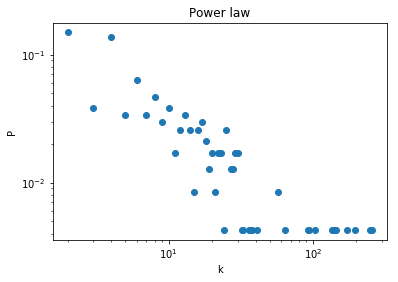

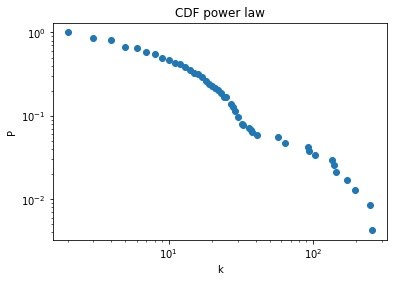

In [13]:
###################################################################################
#Plotting the power law in a log log scale ---- Non cummulative plot
###################################################################################

plt.figure()
plt.title("Power law")
plt.ylabel("P")
plt.xlabel("k")

plt.loglog(deg, cnt, 'o')


#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------


###################################################################################
#Plotting the power law in a log log scale ---- Cummulative plot
###################################################################################


#build cummulative vector
cnt_cdf = []
for i in range(len(cnt)):
	cnt_cdf += [sum(cnt[0:i+1])]

plt.figure()
plt.title("CDF power law")
plt.ylabel("P")
plt.xlabel("k")

plt.loglog(deg, cnt_cdf, 'o')

plt.show()

#package python to compute the linear line is named power law https://pypi.org/project/powerlaw/